In [33]:
import pandas as pd
I=pd.read_csv('E:\\autoencoder_matlab_signals\\I.csv',header=None)
Q=pd.read_csv('E:\\autoencoder_matlab_signals\\Q.csv',header=None)

In [34]:
I.size

131072

In [35]:
print (type(I))

<class 'pandas.core.frame.DataFrame'>


In [36]:
print (I.head(2))

        0        1        2        3        4        5        6        7    \
0 -0.035312 -0.33871 -0.41662 -0.47729 -0.63300 -0.63380 -0.69400 -0.70591   
1 -0.221950 -0.32525 -0.41295 -0.51232 -0.59317 -0.75874 -0.66699 -0.68936   

       8        9      ...         118      119      120      121      122  \
0 -0.74858 -0.59679    ...     0.78949  0.66770  0.74841  0.67772  0.57917   
1 -0.66288 -0.58652    ...    -0.72678 -0.75526 -0.75473 -0.62145 -0.53782   

       123      124      125       126       127  
0  0.53513  0.41053  0.30235  0.106680 -0.024510  
1 -0.51271 -0.53082 -0.29139 -0.097903 -0.014101  

[2 rows x 128 columns]


In [37]:
print (Q.head(2))

       0        1        2        3        4        5        6         7    \
0  0.71087  0.64651  0.69381  0.50525  0.30363  0.22575  0.21976 -0.043558   
1  0.73298  0.53233  0.71315  0.45188  0.30102  0.24525  0.18756 -0.027465   

        8        9     ...          118       119      120      121      122  \
0 -0.130530 -0.16671   ...    -0.066842  0.097331  0.24196  0.27239  0.42559   
1 -0.027471 -0.23572   ...    -0.149270 -0.019008  0.15376  0.14695  0.38743   

       123      124      125      126      127  
0  0.50612  0.60869  0.59595  0.70472  0.65520  
1  0.49483  0.58863  0.58593  0.69765  0.78369  

[2 rows x 128 columns]


In [38]:
import numpy as np
I_array=np.array(I.values)
Q_array=np.array(Q.values)

In [10]:
I_array.shape

(1024, 128)

In [39]:
#给I_array1增加维度
I_array1=I_array[:,np.newaxis,:]

In [40]:
I_array1.shape

(1024, 1, 128)

In [41]:
I_list=I_array1.tolist()

In [42]:
print (len(I_list))
print (len(I_list[0]))
print (len(I_list[0][0]))

1024
1
128


In [43]:
for i in range(1024):
    I_list[i].append(Q_array[i,:])

In [44]:
print (len(I_list))
print (len(I_list[0]))
print (len(I_list[0][0]))

1024
2
128


In [45]:
IQ_data=np.array(I_list)
print (IQ_data.shape)

(1024, 2, 128)


In [47]:
print (IQ_data[0,:,:])

[[-0.035312  -0.33871   -0.41662   -0.47729   -0.633     -0.6338    -0.694
  -0.70591   -0.74858   -0.59679   -0.62308   -0.4955    -0.2989    -0.36909
  -0.091241   0.0682     0.15903    0.249      0.41988    0.53458    0.57115
   0.60156    0.69031    0.7202     0.67608    0.6305     0.5357     0.57461
   0.43139    0.21169    0.20108   -0.075976  -0.14622   -0.29468   -0.40697
  -0.47077   -0.58865   -0.65865   -0.73436   -0.73633   -0.71501   -0.72325
  -0.5544    -0.53067   -0.44136   -0.35869   -0.058208  -0.025293   0.13728
   0.22998    0.41104    0.45703    0.53166    0.6468     0.74076    0.6436
   0.69123    0.65062    0.59569    0.50919    0.37126    0.34462    0.20167
   0.014384   0.16309    0.22429    0.3721     0.47947    0.57185    0.67789
   0.62818    0.65161    0.69794    0.58969    0.6325     0.45107    0.41722
   0.31738    0.080616   0.0092419 -0.17041   -0.28169   -0.41772   -0.48957
  -0.66676   -0.67226   -0.70041   -0.66131   -0.67628   -0.64244   -0.64791
  

In [4]:
#将上面数据处理代码汇总
import numpy as np
import pandas as pd
I=pd.read_csv('E:\\autoencoder_matlab_signals\\I.csv',header=None)
Q=pd.read_csv('E:\\autoencoder_matlab_signals\\Q.csv',header=None)
I_array=np.array(I.values)
Q_array=np.array(Q.values)

#给I_array增加维度
I_array1=I_array[:,np.newaxis,:]
print (I_array1.shape)

I_list=I_array1.tolist()

for i in range(4096):
    I_list[i].append(Q_array[i,:])

IQ_data=np.array(I_list)
print (IQ_data.shape)

(4096, 1, 128)
(4096, 2, 128)


In [5]:
IQ1=IQ_data[:,:,:,np.newaxis]
print (IQ1.shape)
IQ=IQ1.reshape((4096,-1))
print (IQ.shape)

(4096, 2, 128, 1)
(4096, 256)


In [6]:
from keras.models import Model #泛型模型  
from keras.layers import Dense, Input  
import matplotlib.pyplot as plt  

Using TensorFlow backend.


In [75]:
from keras.layers import Convolution2D, MaxPooling2D
kernel_size = (2,64)
input_shape=(2,128,1)
nb_filters=1

In [7]:
# 编码层  
input_data= Input(shape=(256,))   
encoded = Dense(64, activation='tanh',name='1')(input_data) 
encoded_output = Dense(16, activation='relu',name='2')(encoded) 

# 解码层  
decoded = Dense(16, activation='relu',name='3')(encoded_output)  
decoded = Dense(64, activation='relu',name='4')(decoded) 
decoded = Dense(256, activation='tanh',name='5')(decoded) 


In [8]:
# 构建自编码模型  
autoencoder = Model(inputs=input_data, outputs=decoded)  

# 构建编码模型  
encoder = Model(inputs=input_data, outputs=encoded_output)  

In [9]:
# compile autoencoder  
autoencoder.compile(optimizer='adam', loss='mse')  
  
# training  
autoencoder.fit(IQ, IQ, epochs=20, batch_size=256, shuffle=True)  

Epoch 1/20
4096/4096 [==============================] - 0s - loss: 0.2492     
Epoch 2/20
4096/4096 [==============================] - 0s - loss: 0.2230     
Epoch 3/20
4096/4096 [==============================] - 0s - loss: 0.1797     
Epoch 4/20
4096/4096 [==============================] - 0s - loss: 0.1296     
Epoch 5/20
4096/4096 [==============================] - 0s - loss: 0.0867     
Epoch 6/20
4096/4096 [==============================] - 0s - loss: 0.0576     
Epoch 7/20
4096/4096 [==============================] - 0s - loss: 0.0331     
Epoch 8/20
4096/4096 [==============================] - 0s - loss: 0.0191     
Epoch 9/20
4096/4096 [==============================] - 0s - loss: 0.0129     
Epoch 10/20
4096/4096 [==============================] - 0s - loss: 0.0099     
Epoch 11/20
4096/4096 [==============================] - 0s - loss: 0.0081     
Epoch 12/20
4096/4096 [==============================] - 0s - loss: 0.0069     
Epoch 13/20
4096/4096 [==========================

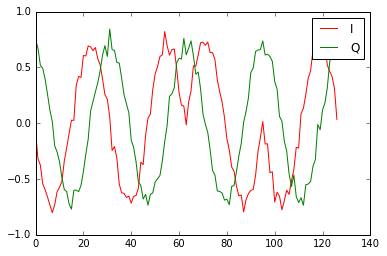

In [23]:
I_1=IQ[0,0:127]
Q_1=IQ[0,128:256]
%matplotlib inline
plt.plot(I_1,'r')
plt.plot(Q_1,'g')
plt.legend(['I','Q'])

In [24]:
IQ_predict=autoencoder.predict(IQ)

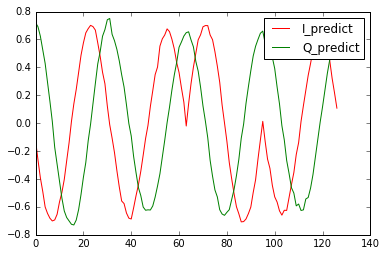

In [25]:
I_predict1=IQ_predict[0,0:127]
Q_predict1=IQ_predict[0,128:256]
%matplotlib inline
plt.plot(I_predict1,'r')
plt.plot(Q_predict1,'g')
plt.legend(['I_predict','Q_predict'])

In [26]:
IQ_low_dim=encoder.predict(IQ)

<Container object of 3 artists>

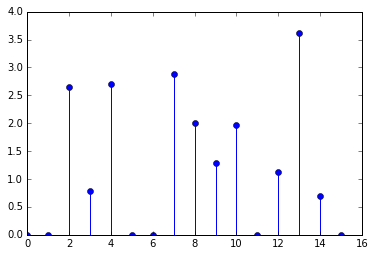

In [27]:
IQ_low_dim1=IQ_low_dim[0,:]
%matplotlib inline
plt.stem(np.arange(16),IQ_low_dim1)

In [28]:
I_test=pd.read_csv('E:\\autoencoder_matlab_signals\\I1.csv',header=None)
Q_test=pd.read_csv('E:\\autoencoder_matlab_signals\\Q1.csv',header=None)
I_test_array=np.array(I_test.values)
Q_test_array=np.array(Q_test.values)

#给I_array增加维度
I_test_array1=I_test_array[:,np.newaxis,:]
print (I_test_array1.shape)

I_test_list=I_test_array1.tolist()

for i in range(4096):
    I_test_list[i].append(Q_test_array[i,:])

IQ_test_data=np.array(I_list)
print (IQ_test_data.shape)

(4096, 1, 128)
(4096, 2, 128)


In [29]:
IQ1_test=IQ_test_data[:,:,:,np.newaxis]
print (IQ1_test.shape)
IQ_test=IQ1_test.reshape((4096,-1))
print (IQ_test.shape)

(4096, 2, 128, 1)
(4096, 256)


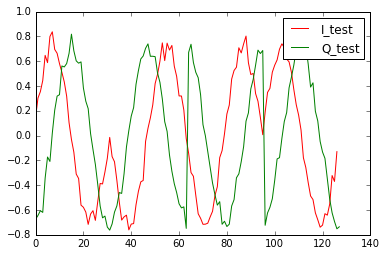

In [32]:
I_test_1=IQ_test[1,0:127]
Q_test_1=IQ_test[1,128:256]
%matplotlib inline
plt.plot(I_test_1,'r')
plt.plot(Q_test_1,'g')
plt.legend(['I_test','Q_test'])

In [33]:
IQ_test_predict=autoencoder.predict(IQ_test)

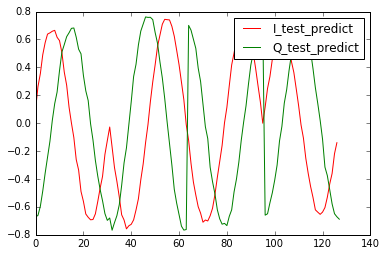

In [35]:
I_test_predict1=IQ_test_predict[1,0:127]
Q_test_predict1=IQ_test_predict[1,128:256]
%matplotlib inline
plt.plot(I_test_predict1,'r')
plt.plot(Q_test_predict1,'g')
plt.legend(['I_test_predict','Q_test_predict'])

In [36]:
IQ_test_low_dim=encoder.predict(IQ_test)

<Container object of 3 artists>

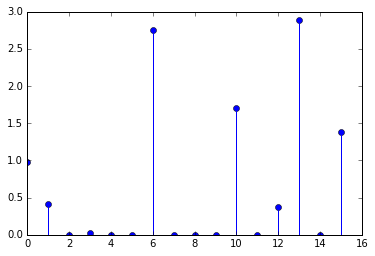

In [37]:
IQ_test_low_dim1=IQ_test_low_dim[1,:]
%matplotlib inline
plt.stem(np.arange(16),IQ_test_low_dim1)

In [14]:
a=[[],[]]
for u in a:
    u.append(2)

In [15]:
a

[[2], [2]]

In [22]:
a=[[1,2,3][]]
np.size(a)

3

In [ ]:
a[]